# Book recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Books = pd.read_csv('Books.csv')
Ratings = pd.read_csv('Ratings.csv')
Users = pd.read_csv('Users.csv')

In [3]:
print(Books.shape)
print(Ratings.shape)
print(Users.shape)

(16790, 8)
(1149780, 3)
(278858, 3)


In [4]:
#Checking for missing values of Books

Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    1
Publisher              1
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [5]:
#Checking for missing values of Users and most likely we wont use age info

Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [6]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [7]:
Users.duplicated().sum()
Ratings.duplicated().sum()
Books.duplicated().sum()

0

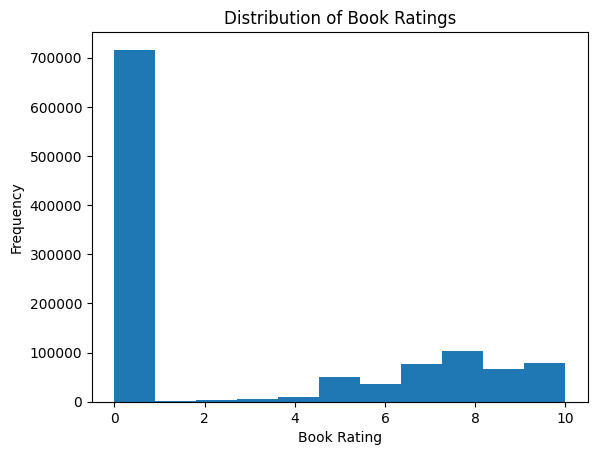

In [30]:
plt.hist(Ratings['Book-Rating'], bins=11)
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.show()

## Popularity based Recommendation System

In [8]:
Ratings_with_BookName = Ratings.merge(Books,on = 'ISBN')

In [9]:
Ratings_with_BookName

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
351631,216466,037312273X,0,To Marry McAllister (Bachelor Cousins) (Harle...,Carole Mortimer,2002.0,Harlequin,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...
351632,274308,037312273X,0,To Marry McAllister (Bachelor Cousins) (Harle...,Carole Mortimer,2002.0,Harlequin,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...
351633,178032,006008829X,8,Choices: Taking Control of Your Life and Makin...,Melody Beattie,2002.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...
351634,270838,006008829X,10,Choices: Taking Control of Your Life and Makin...,Melody Beattie,2002.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...


In [10]:
#Ratings_with_BookName["Book-Title"] = Ratings_with_BookName["Book-Title"].str.replace("[^a-zA-Z0-9]", " ", regex=True)

In [11]:
num_ratings_df= Ratings_with_BookName.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating':'Num-Rating'},inplace=True)
num_ratings_df

,Book-Title,Num-Rating
0,It Takes Two,2
1,Tales of Terror and Suspense,1
2,'48,4
3,'Salem's Lot,32
4,".Hack: //Legend of the Twilight, Vol. 1",5
...,...,...
15825,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",3
15826,stardust,51
15827,Â¿QuiÃ©n se ha llevado mi queso?,2
15828,"Â¿QuÃ© me quieres, amor?",9


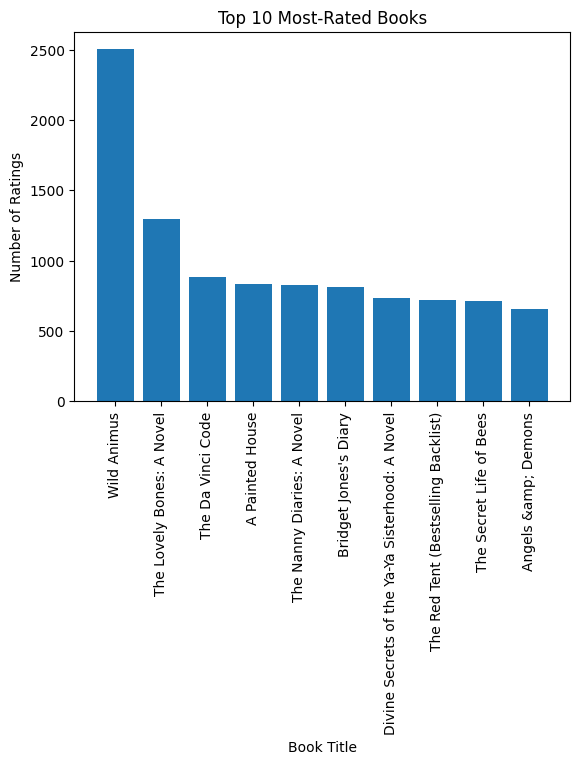

In [31]:
# Plotting a bar chart of the top 10 most-rated books
num_ratings_df = Ratings_with_BookName.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating':'Num-Rating'}, inplace=True)
num_ratings_df = num_ratings_df.sort_values('Num-Rating', ascending=False).head(10)

plt.bar(num_ratings_df['Book-Title'], num_ratings_df['Num-Rating'])
plt.xticks(rotation=90)
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most-Rated Books')
plt.show()


In [12]:
Ratings_with_BookName['Book-Rating'] = Ratings_with_BookName['Book-Rating'].astype(float)
avg_ratings_df = Ratings_with_BookName.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_ratings_df.rename(columns={'Book-Rating':'Avg-Rating'},inplace=True)
avg_ratings_df

,Book-Title,Avg-Rating
0,It Takes Two,0.000000
1,Tales of Terror and Suspense,0.000000
2,'48,0.000000
3,'Salem's Lot,3.406250
4,".Hack: //Legend of the Twilight, Vol. 1",6.400000
...,...,...
15825,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",6.000000
15826,stardust,4.137255
15827,Â¿QuiÃ©n se ha llevado mi queso?,7.500000
15828,"Â¿QuÃ© me quieres, amor?",3.000000


In [13]:
popular_df = num_ratings_df.merge(avg_ratings_df,on='Book-Title')
popular_df

,Book-Title,Num-Rating,Avg-Rating
0,It Takes Two,2,0.000000
1,Tales of Terror and Suspense,1,0.000000
2,'48,4,0.000000
3,'Salem's Lot,32,3.406250
4,".Hack: //Legend of the Twilight, Vol. 1",5,6.400000
...,...,...,...
15825,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",3,6.000000
15826,stardust,51,4.137255
15827,Â¿QuiÃ©n se ha llevado mi queso?,2,7.500000
15828,"Â¿QuÃ© me quieres, amor?",9,3.000000


In [14]:
# only keep books with at least 250 ratings
# sort by average rating in descending order
popular_df = popular_df[popular_df['Num-Rating']>=250].sort_values('Avg-Rating',ascending=False).head(50)
popular_df

,Book-Title,Num-Rating,Avg-Rating
5148,Harry Potter and the Prisoner of Azkaban (Book 3),423,5.867612
5146,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
5149,Harry Potter and the Sorcerer's Stone (Book 1),272,5.724265
5147,Harry Potter and the Order of the Phoenix (Boo...,334,5.571856
5145,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
12463,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
5150,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175
12145,The Fellowship of the Ring (The Lord of the Ri...,344,4.898256
14513,To Kill a Mockingbird,488,4.704918
11853,The Da Vinci Code,887,4.658399


In [15]:
popular_df = popular_df.merge(Books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Num-Rating','Avg-Rating']]
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

/tmp/ipykernel_66802/1698454350.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(popular_df['Book-Title'][:10], popular_df['Num-Rating'][:10])


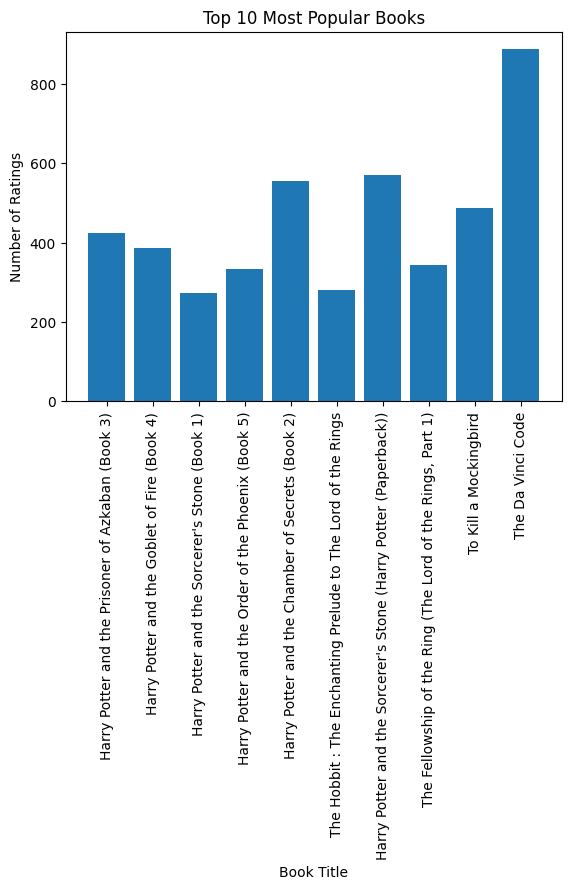

In [32]:
# create a bar chart for the top 10 most popular books
plt.bar(popular_df['Book-Title'][:10], popular_df['Num-Rating'][:10])
plt.xticks(rotation=90)
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Popular Books')
plt.show()


## Collabrative Based Recommendation System

In [16]:
x = Ratings_with_BookName.groupby('User-ID').count()['Book-Rating'] > 100
similar_users = x[x].index

In [17]:
filtered_rating = Ratings_with_BookName[Ratings_with_BookName['User-ID'].isin(similar_users)]

In [18]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 30
famous_books = y[y].index

In [19]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
pt = final_ratings.pivot_table(index='Book-Title',columns = 'User-ID',values='Book-Rating')
pt

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1st to Die: A Novel,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pt.fillna(0,inplace=True)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
similarity_scores = cosine_similarity(pt)

In [23]:
similarity_scores.shape

(988, 988)

In [24]:
def recommend(book_name):
    
    # Convert book name to lower case
    book_name = book_name.lower()
    
    # Find books with matching (partial) titles
    matching_books = []
    for title in pt.index:
        if book_name in title.lower():
            matching_books.append(title)
    
    # Find similar items for each matching book
    data = []
    for book_title in matching_books:
        # Index fetch
        index = np.where(pt.index==book_title)[0][0]
        similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1], reverse=True)[1:6]
    
        for i in similar_items:
            item = []
            temp_df = Books[Books['Book-Title'] == pt.index[i[0]]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend([author.lower() for author in list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values)])
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
            data.append(item)
    
    return data


In [29]:
recommend('harry')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'j. k. rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'j. k. rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'j. k. rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'j. k. rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'j. k. rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'j. k. rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'j. k. rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Har

In [26]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [27]:
Books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
16784,0064401324,Stone Fox,John Reynolds Gardiner,1983.0,HarperTrophy,http://images.amazon.com/images/P/0064401324.0...,http://images.amazon.com/images/P/0064401324.0...,http://images.amazon.com/images/P/0064401324.0...
16785,0671702262,Are You My Mommy?,Carla Dijs,1990.0,Little Simon,http://images.amazon.com/images/P/0671702262.0...,http://images.amazon.com/images/P/0671702262.0...,http://images.amazon.com/images/P/0671702262.0...
16786,0819310077,But No Elephants (A Parents Magazine Read Alou...,Jerry Smath,1980.0,Penguin USA,http://images.amazon.com/images/P/0819310077.0...,http://images.amazon.com/images/P/0819310077.0...,http://images.amazon.com/images/P/0819310077.0...
16787,0688025072,The Wicked Day,Mary Stewart,1983.0,Harpercollins,http://images.amazon.com/images/P/0688025072.0...,http://images.amazon.com/images/P/0688025072.0...,http://images.amazon.com/images/P/0688025072.0...


In [28]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(Books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))